<a href="https://colab.research.google.com/github/ArunVignesh75/Machine-Learning/blob/main/BrokenRice_Detection_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Finding Total and Broken Rice Grains Using OpenCV

#Data Information:


Given a Sample Image:

You can assume the following in the image:

● The background will always be blue.

● There will be a mix of broken and non-broken rice grains.

● The grains will not overlap but can touch each other.

Objective 1: Count the number of rice grains in the Image.

Objective 2: Find the number of broken grains in the image.


#Importing nescessary Packages 

In [ ]:
import os
import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


To process an image given its path and return the number of total rice and the number of broken rice in the image. 

It does so by first reading the image, converting it to grayscale, and then applying image processing techniques such as adaptive thresholding, morphological operations, and erosion to extract the rice contours. 

Finally, it counts the number of contours and filters the ones that have a smaller area than 800 to determine the number of broken rice.

In [ ]:
def process_image(img_path):
    img = cv.imread(img_path) 
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    output_adapthresh = cv.adaptiveThreshold(gray, 255.0, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 51, -20.0)
    kernel = np.ones((3),np.uint8)
    clear_image = cv.morphologyEx(output_adapthresh, cv.MORPH_OPEN, kernel, iterations=8)
    kernel = np.ones((5,5),np.uint8)
    output_erosion = cv.erode(clear_image, kernel)
    contours, _ = cv.findContours(output_erosion, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    total_rice = len(contours)
    broken_rice = sum(1 for x in contours if cv.contourArea(x) < 800)
    # Display the adaptive threshold image
    plt.imshow(output_adapthresh, cmap='gray')
    plt.title('Adaptive Threshold Image')
    plt.show()
    
    # Display the contour detection image
    img_copy = img.copy()
    cv.drawContours(img_copy, contours, -1, (0,255,0), 3)
    plt.imshow(img_copy)
    plt.title('Contour Detection Image')
    plt.show()
    return total_rice, broken_rice


#Loading the Data

In [ ]:
img_folder = "/content/drive/MyDrive/test"
results = []

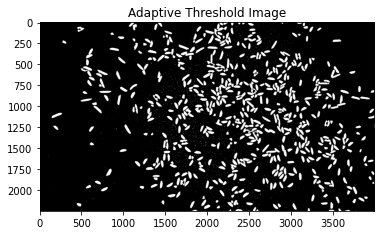

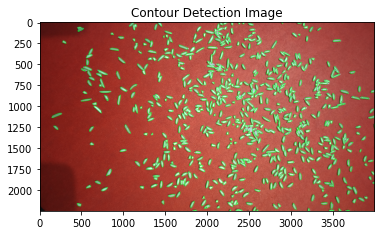

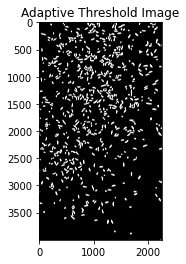

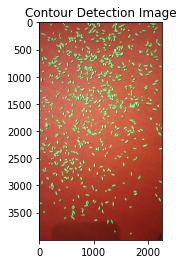

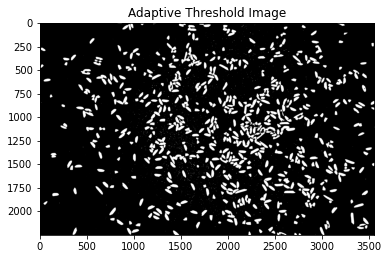

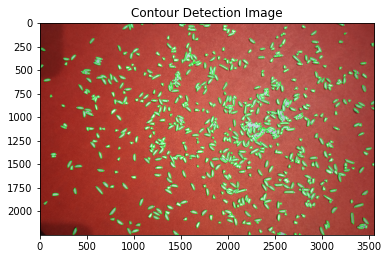

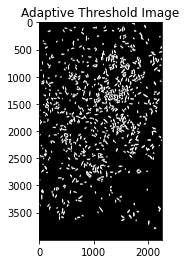

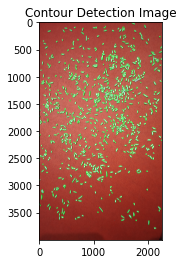

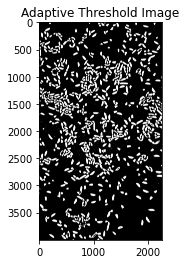

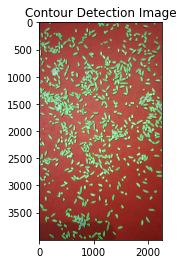

In [ ]:
for img_name in os.listdir(img_folder):
    img_path = os.path.join(img_folder, img_name)
    total_rice, broken_rice = process_image(img_path)
    results.append((img_name, total_rice, broken_rice))


#Creating new Dataframe to Save the Values of Total rice and Broken rice

In [ ]:
df = pd.DataFrame(results, columns=["file_name", "total_rice_grain", "total_broken_rice_grain"])
df

,file_name,total_rice_grain,total_broken_rice_grain
0,image_1.jpg,598,146
1,image_3.jpg,617,301
2,image_2.jpg,622,284
3,image_4.jpg,692,395
4,image_5.jpg,760,190


In [ ]:
df.to_csv("submission.csv", index=False)